## Ford GoBike Data Exploration
### by Sarah Abdelkader

#### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>

</ul>

<a id='intro'></a>
<h3> Introduction</h3>

The dataset that includes information is provided from "**Ford GoBike**" bike-sharing system that exists in the greater San Francisco Bay area. The data includes details about the daily bike trips performed durng the month of February 2019.

In the following Notebook, I will perform different analysis operations; univariate, bivariate, and multivariate explorations on data. 

At the end I will draw my conclusion based of the analysis done on the most interesting features of the dataset.

In [72]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import calendar
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

<a id='wrangling'></a>
<h3> Preliminary Wrangling</h3>

I start this section with loading the dataset and having an overview on the existing features.

In [73]:
#load data to view attributes 
df= pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [74]:
#An overview on the columns and datatypes 
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

(183412, 16)

In [75]:
#Check for duplicate Values
df.duplicated().sum()

0

In [76]:
#Detect Null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

<a id='cleaning'></a>
<h3> Data Cleaning</h3>

After having an overview on the data, null values and duplicates, I will perform data cleaning step, by droping unneccessary columns and extracting details to ensure the feasability of all attributes, and have a proper final dataset.

**a. Creating Age column from birth dates**

In [77]:
#Creating Column for Age to faciliate the study of user groups
now = int(dt.datetime.now().year)
df['age'] = now - df['member_birth_year']

**b. Creating Separate Age Groups**

In [78]:
#Creating Age Groups to use it later in my analysis
#https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas#:~:text=If%20age%20%3E%3D%200%20%26%20age,so%20on%20.....

bins= [0,18,31,45,100]
labels = ['<18','18-30','30-45','Above 45']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.sort_values(by='age')

#I will drop records of users with age out of my study area to avoid the effect of unneccessary outliers
df.dropna(inplace=True)

**c. Converting Trip Duration into Minutes**

In [79]:
#Convert duration to minutes 
#https://www.programiz.com/python-programming/methods/built-in/round
df['duration_min'] = round(df['duration_sec']/60,2)

**d. Excluding trips with illogical duration**

In [80]:
#Ignoring Trips which lasted more than 1 day
df = df[df.duration_min < 1440]
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,AgeGroup,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0,30-45,869.75
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0,Above 45,1030.90
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33.0,30-45,608.17
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48.0,Above 45,26.42
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,63.0,Above 45,29.88


In [81]:
#Convert datatypes to appropriate ones
#https://www.geeksforgeeks.org/convert-floats-to-integers-in-a-pandas-dataframe/
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [82]:
#Extracting Day of week and hour from date 
#https://pythonexamples.org/python-datetime-get-weekday-as-number/
df['start_hour'] = df.start_time.dt.strftime('%H')
df['Day'] = df.start_time.dt.strftime('%a')
df['Day_Order'] = df.start_time.dt.strftime("%w")

**e. Drop nulls unneccessary columns**

In [83]:
#Drop unneccesary columns
df.drop(columns=['member_birth_year','start_station_id','end_station_id','bike_id','bike_share_for_all_trip','duration_sec'], inplace=True)

In [84]:
df.to_csv('df_slides.csv', index=None)

### What is the structure of your dataset?

The raw dataset consists of 183,412 records, each representing s bike trip recorded by Ford Gobike system.
Total number of feature which include details about:

1. Trip Details
- Start and End time of each trip
- Station Names and unique IDs
- Stations' Coordinates

2. User Details
- User Group, whether customer or subscriber
- User Date of Birth
- Gender        

### What is/are the main feature(s) of interest in your dataset?

I'm interested in studying the relationship between the trip details and how they are connected to the users from different ages, gender and groups. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To get the my desired results, I will focus on using the attributes that have the trip duration, start and end stations and relate it to user groups, age and gender. 

<a id='uni'></a>
<h3> Univariate Exploration</h3>

I start this section with having a look on both user attributes and trip attribtues seperately.

**User Attributes Analysis**

- Study the percentage of user groups between customers and regular subscribers

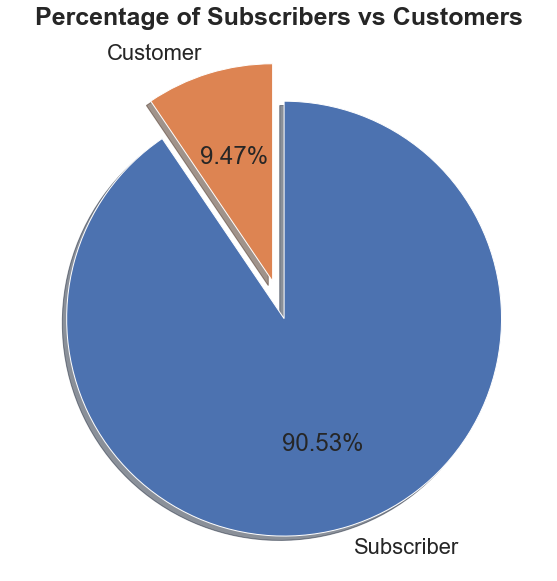

In [85]:
#https://www.statology.org/seaborn-pie-chart/
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

#define data
user_grp= df['user_type'].value_counts()

#define Seaborn color palette
colors = sns.color_palette('deep')

#create pie chart
plt.figure(figsize=(15,10))
sns.set_theme( font_scale=2)
explode = (0.08, 0.1)
plt.pie(user_grp, labels = user_grp.index, shadow=True, explode=explode, counterclock = False, startangle = 90, colors=colors, autopct='%.2f%%');
plt.title('Percentage of Subscribers vs Customers', fontsize=25,weight='bold');

>Chart showing the ratio of user groups

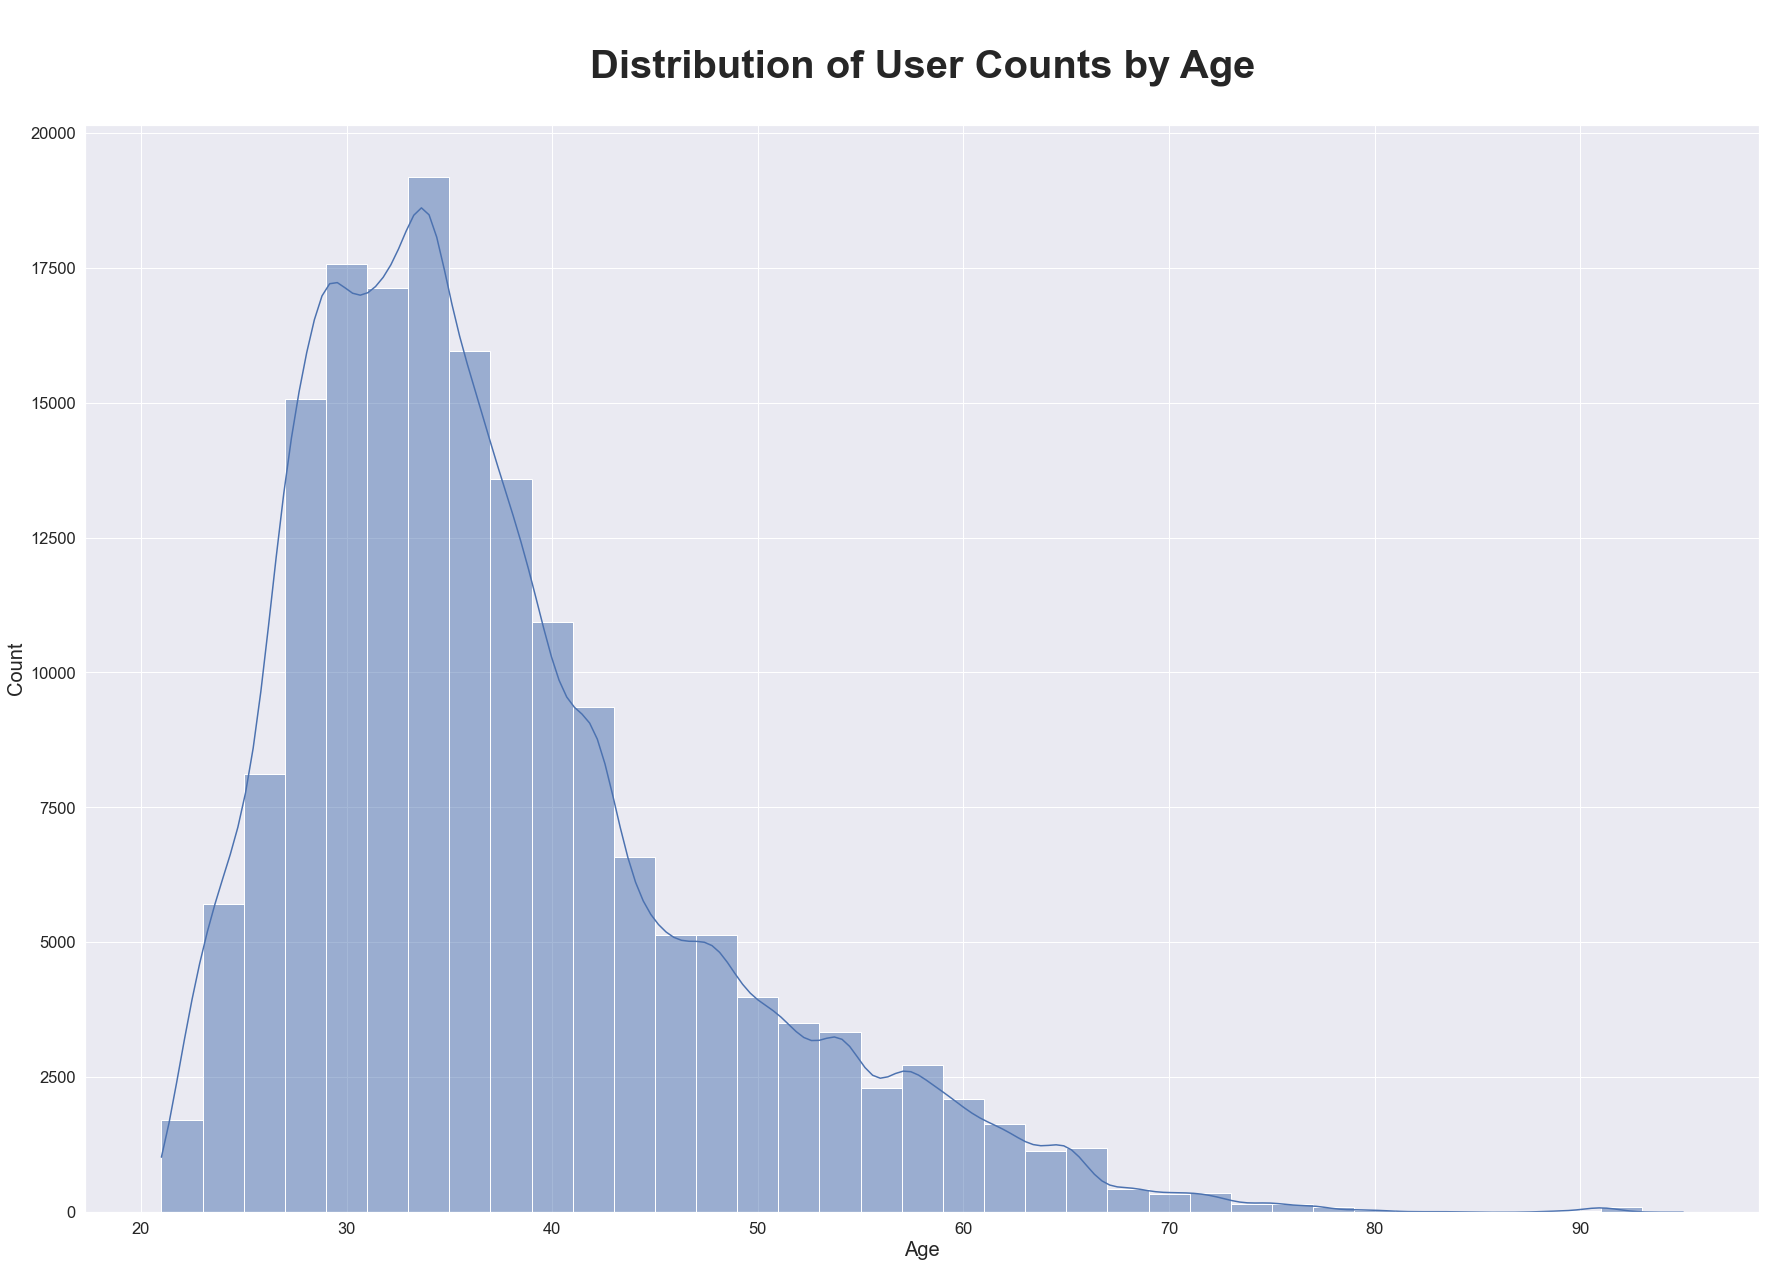

In [86]:
sns.set(rc={'figure.figsize':(30,20)})
sns.set_theme(font_scale=1.5)
sns.histplot(df['age'], binwidth=2, kde=True)
plt.title('\nDistribution of User Counts by Age\n',fontsize = 40,weight='bold')
plt.xlabel('Age',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

>Chart showing the distribution of user ages

**Trip Details Analysis**

- Study of Stations Popularity 

It is interesting to understand the most common routes among bike users in San Franceso.

Thus, here I will go through the 10 most end and start popular stations. I will detect how populat they re by the count of trips from and to each station.-

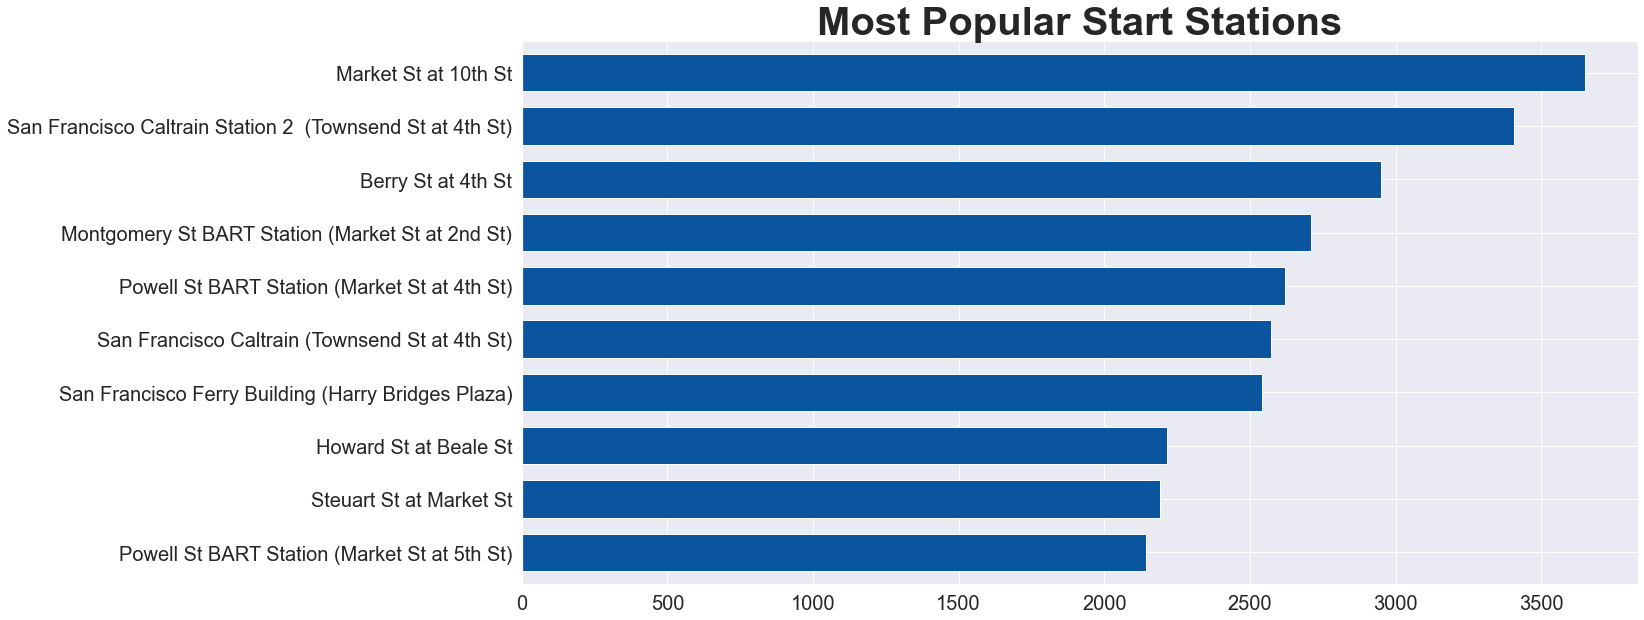

In [87]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html
pop_st_stations= df.start_station_name.value_counts(ascending=True).tail(10)
sns.set(rc={'figure.figsize':(20,10)});
sns.set_theme( palette='Blues_r');
plt.title('Most Popular Start Stations', fontsize=40, fontweight='bold')
ax = pop_st_stations.plot.barh(fontsize=20, width=0.7)

>Chart showing the most popular start stations

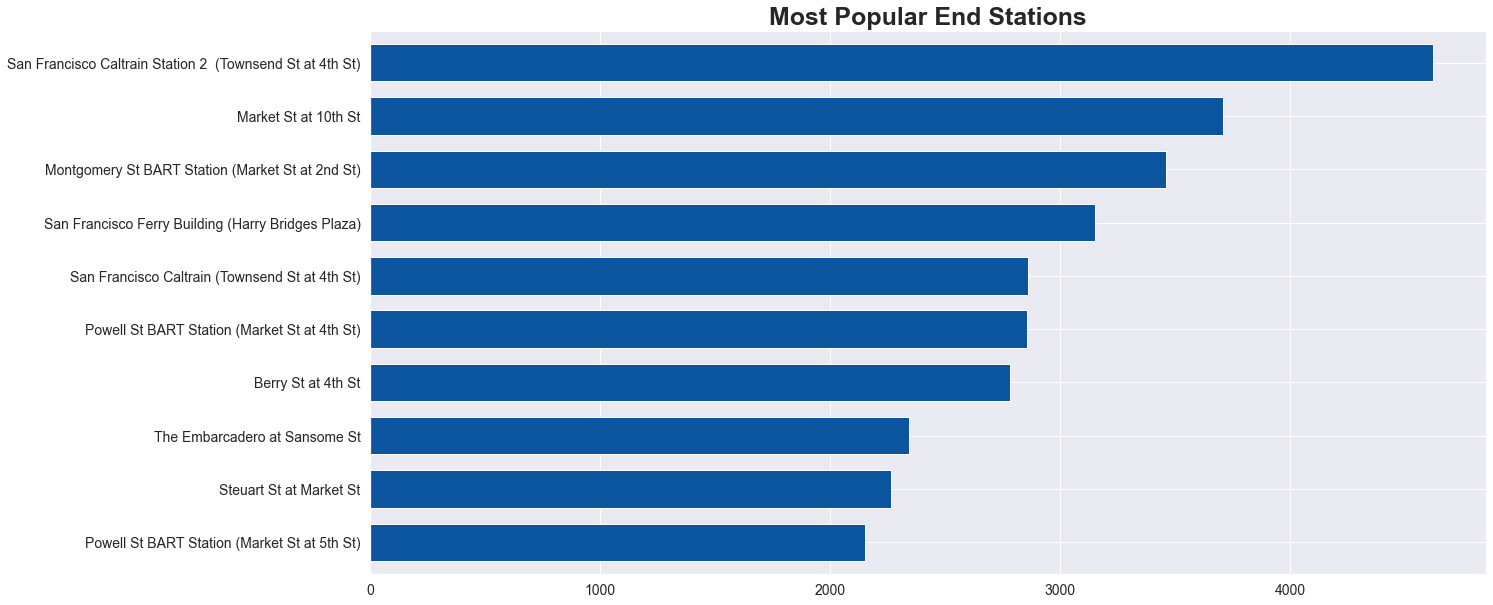

In [88]:
pop_end_stations= df.end_station_name.value_counts(ascending=True).tail(10)
sns.set(rc={'figure.figsize':(20,10)});
sns.set_theme( palette='Blues_r');
plt.title('Most Popular End Stations', fontsize=25, fontweight='bold')
ax = pop_end_stations.plot.barh(fontsize=14, width=0.7)

>Chart showing the most popular end stations

From the previous 2 charts, I can see that most popular start and end stations are almost the same, with some shuffle in the order of their popularity. 

I can assume this is because users use bikes on regular basis in their way to specific locations (probably work), and back to same pick locations. 

Further analysis will illustrate if their is a relation between the popularity of thos stations and the timing of daily trips.

<a id='bi'></a>
<h3>Bivariate Exploration</h3>

In this section, I'll investigate the relationships between pairs of variables to better understand the relation between users' age and the trips chracterstics.

a. Trip Duration vs Age

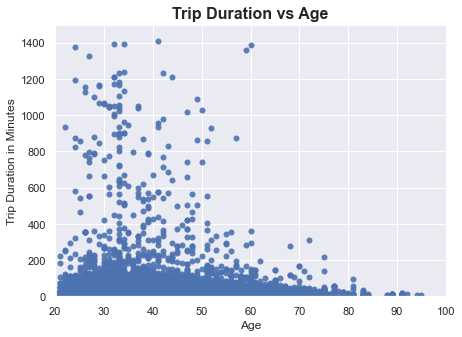

In [89]:
dfnew= df[['age','duration_min']]
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(data=dfnew, y="duration_min", x="age",alpha=0.9, linewidth=0)
plt.axis([ 20,100, 0, 1500])
plt.title('Trip Duration vs Age',fontsize=16, weight='bold')
plt.xlabel('Age')
plt.ylabel('Trip Duration in Minutes')
plt.show()

>Chart showing the trip duration vs user age

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this section, I was looking into the durstion of trips and it's relation to the user age. From the chart, I can see that higher triip durations exist more at younger age. While the higher the age, the less the duration. 

The results seem reasonable, as biking is an activity on which youth depend on more than elderly people. 

In [90]:
duration_hour=df
duration_hour.index=[df['start_hour']]
duration_hour.sort_index(inplace=True)

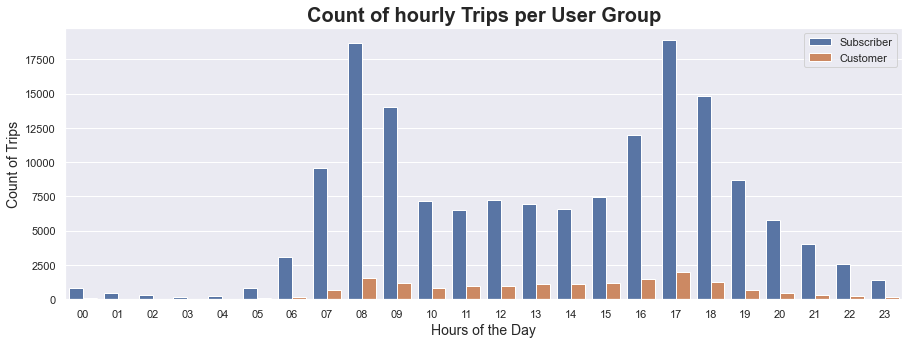

In [91]:
#Count of Daily Trips per User Group
plt.figure(figsize = (15, 5))
sns.countplot(data = duration_hour, x=duration_hour['start_hour'] , hue = 'user_type',palette='deep')
plt.title('Count of hourly Trips per User Group', fontsize=20, weight='bold')
plt.xlabel('Hours of the Day',  fontsize=14)
plt.ylabel('Count of Trips',  fontsize=14)
plt.legend()
plt.show()

In [92]:
#create column for month index extracted from Release_Date column
#http://blog.quizzicol.com/2016/10/03/sorting-dates-in-python-by-day-of-week/
duration_day=df
duration_day.index=duration_day['Day_Order']
duration_day.sort_index(inplace=True)

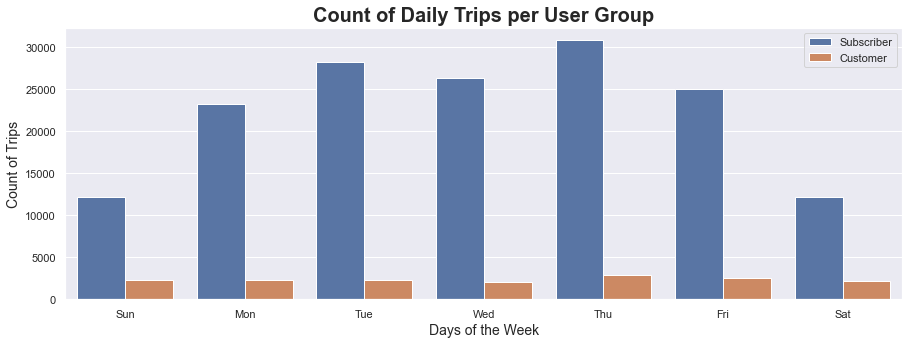

In [93]:
#Count of Daily Trips per User Group
plt.figure(figsize = (15, 5))
sns.countplot(data = duration_day, x=duration_day['Day'], hue = 'user_type',palette='deep')
plt.title('Count of Daily Trips per User Group', fontsize=20, weight='bold')
plt.xlabel('Days of the Week',  fontsize=14)
plt.ylabel('Count of Trips',  fontsize=14)
plt.legend()
plt.show()

Something interesting that I noticed is that people use the bikes more on week days more than weekends. The thing that emphasizes this, is that the maximum count of trips taken on daily basis (for both customers and subscribers) is on 8:00 am and 5:00pm, which is around the timeframe of working hours.

This illustrates that people use bikes basically used as means of transportation rather than rides for fun!

<a id='multi'></a>
<h3>Multivariate Exploration</h3>

In this section, I will look into the reltaion between the users gender and age, and see if this have any direct impact on trip duration.

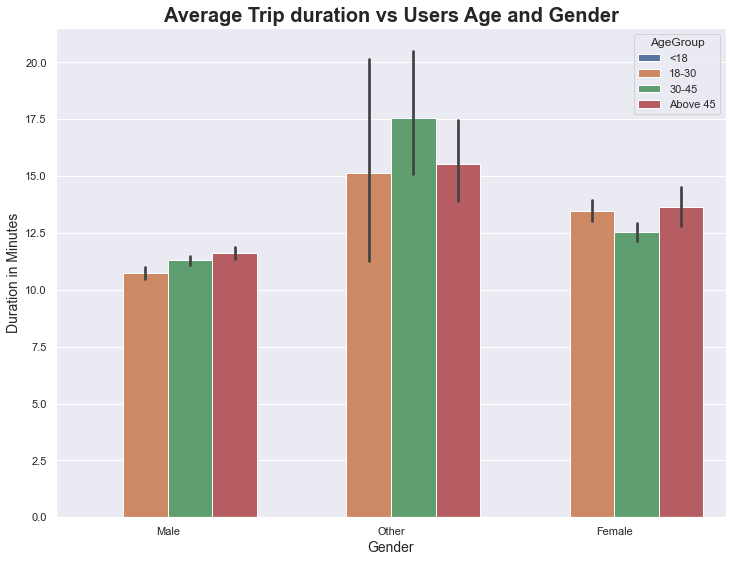

In [94]:
# create bar plot on gender versus duration on levels of the age bins variable
plt.figure(figsize = (12, 9))

ax = sns.barplot(x='member_gender', y = 'duration_min', hue='AgeGroup', data=df.sort_values(by= 'AgeGroup'), palette='deep')
plt.title('Trip duration vs Users Age and Gender', fontsize=20, weight='bold' )
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Duration in Minutes', fontsize=14)
plt.show()

### Were there any interesting or surprising interactions between features?

An interesting yet surprising result I noticed, is that the count of female users from all age groups is higher than that of males! 
As biking is a way of transportation that requires physical effort I would expect the results to be otherwise. 

However, it is noticable that the count of "other" gender is higher than each of males and females, so it could that some people didn't care to fill details correctly that is why we have higher count in this category.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!